In [19]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')









import plotly.express as px


def take_percentage(df):
    df_state = df[df['County name'].isna()][df['State'].notna()][['State',2005,2015,2021]]
    df_county = df[df['County name'].notna()][['FIPS*','State','County name',2005,2015,2021]]
    for indx,row in df_county.iterrows():
        state = row['State']
        state_val = df_state[df_state['State']==state]
        for year in [2005,2015,2021]:
            percentage = 100*row[year]/state_val[year].values
            df_county.loc[indx,year] = percentage[0]
    return df_county





living_res_df = pd.read_excel('living resources GDP.xlsx').dropna(how = 'all')
living_res_df = take_percentage(living_res_df)
living_res_df.head(8)

marine_construct_df = pd.read_excel('marine construction.xlsx')
marine_construct_df = take_percentage(marine_construct_df.dropna(how = 'all'))
marine_construct_df[2005] = marine_construct_df[2005].fillna(2*marine_construct_df[2015]-marine_construct_df[2021])
marine_construct_df[2015] = marine_construct_df[2015].fillna(0.5*marine_construct_df[2005] + 0.5*marine_construct_df[2021])
marine_construct_df = marine_construct_df.dropna()
marine_construct_df.head(8)

marine_transport_df = pd.read_excel('marine transportation.xlsx')
marine_transport_df = take_percentage(marine_transport_df.dropna(how = 'all'))
marine_transport_df[2005] = marine_transport_df[2005].fillna(2*marine_transport_df[2015]-marine_transport_df[2021])
marine_transport_df[2015] = marine_transport_df[2015].fillna(0.5*marine_transport_df[2005] + 0.5*marine_transport_df[2021])
marine_transport_df = marine_transport_df.dropna()
marine_transport_df.head(8)

tot_ocean_eco = take_percentage(pd.read_excel('total ocean economy.xlsx').dropna(how = 'all'))
tot_ocean_eco[2005] = tot_ocean_eco[2005].fillna(2*tot_ocean_eco[2015]-tot_ocean_eco[2021])
tot_ocean_eco.head(8)

tourism_df = pd.read_excel('tourism and receration.xlsx').dropna(how = 'all')
tourism_df = take_percentage(tourism_df)
tourism_df.head(8)

,FIPS*,State,County name,2005,2015,2021
1,48039.0,Texas,Brazoria,1.581690,0.916605,1.074360
2,48061.0,Texas,Cameron,10.343973,10.403126,10.699476
3,48167.0,Texas,Galveston,23.854850,24.932156,24.767944
4,48245.0,Texas,Jefferson,3.301914,3.058323,3.262003
5,48355.0,Texas,Nueces,32.923114,31.833277,27.848269
8,22051.0,Louisiana,Jefferson,27.523850,26.759547,29.565573
9,22057.0,Louisiana,Lafourche,0.459091,0.869343,0.705755
10,22071.0,Louisiana,Orleans,59.719514,59.891353,53.838294


In [20]:
import plotly.express as px
# Reshape the dataframe
df_melt = tot_ocean_eco.melt(id_vars=['FIPS*', 'State', 'County name'], var_name = ['Year'], value_vars=[2005,2015,2021], value_name='Total Ocean GDP')
df_melt['State_County'] = df_melt['State'] + df_melt['County name']

# Sort the DataFrame
df_melt = df_melt.sort_values(by=['State', 'County name'])

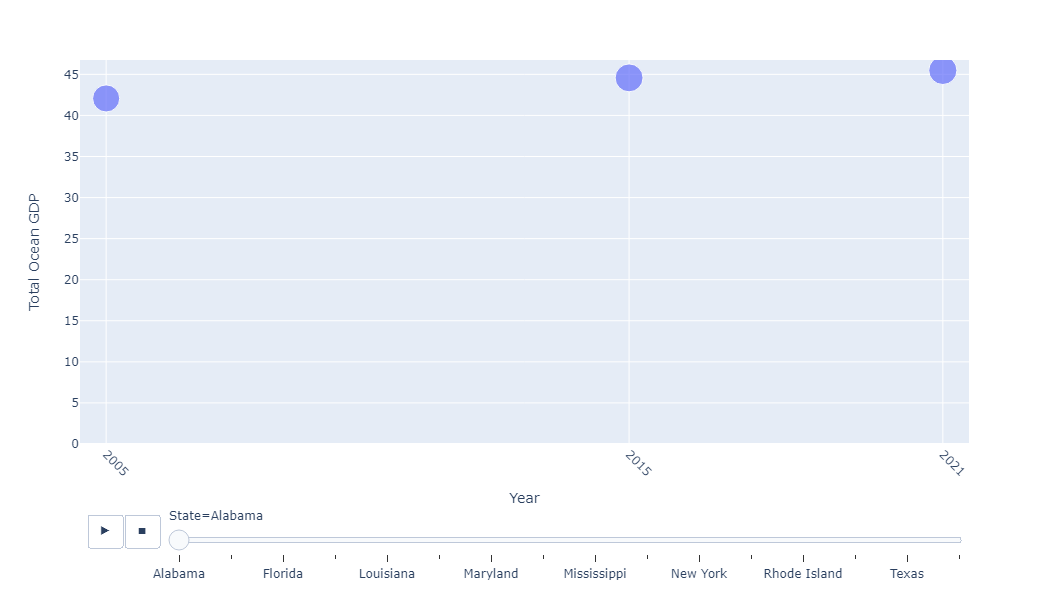

In [21]:
df_state = df_melt[['State','Year','Total Ocean GDP']].groupby(['State','Year']).mean()

# Create the line plot
fig = px.scatter(df_state.reset_index(), x='Year', y='Total Ocean GDP', animation_frame='State',
              hover_name = 'Total Ocean GDP', range_y=[0,df_state['Total Ocean GDP'].max()+1],
              size = 'Total Ocean GDP',range_x = [2004.5,2021.5], width = 600, height = 500)

# Update the layout to specify 5 custom x-axis ticks
fig.update_layout(
    width = 800, height = 600,
    xaxis=dict(
        tickmode='array',
        # Set the positions where the ticks should appear
        tickvals=[2005,2015,2021],
        # Set the text labels for the ticks
        ticktext=[2005,2015,2021]
    )
)

# Rotate the tick labels if needed
fig.update_xaxes(tickangle=45)
fig.show()

In [ ]:



import geopandas as gpd
import geoplot as gplt

# Load the json file with county coordinates
geoData = gpd.read_file('https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/US-counties.geojson')



# Remove Alaska, Hawaii and Puerto Rico.
stateToRemove = ['02', '15', '72']
geoData = geoData[~geoData.STATE.isin(stateToRemove)]


# Make sure the "id" column is an integer
geoData.id = geoData.id.astype(str).astype(int)
geoData = geoData[geoData['id']!=5051]

# Basic plot with just county outlines
gplt.polyplot(geoData);

import geopandas as gpd
import geoplot as gplt

# Load the json file with county coordinates
geoData = gpd.read_file('https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/US-counties.geojson')



# Keep east coast states
stateToKeep = ['01', '05', '10', '12', '13', '22', '23', '24', '25', '28', '34',
       '36', '37', '44', '45', '48', '51']
geoData = geoData[geoData.STATE.isin(stateToKeep)]


# Make sure the "id" column is an integer
geoData.id = geoData.id.astype(str).astype(int)
geoData = geoData[geoData['id']!=5051]

# Basic plot with just county outlines
gplt.polyplot(geoData);





tourism_df['FIPS*'] = tourism_df['FIPS*'].astype(int)
fullData = geoData.merge(tourism_df, left_on=['id'], right_on=['FIPS*'], how = 'left').drop(columns = ['FIPS*', 'State','County name'])
# fullData[2015]= (fullData[2015]-fullData[2005])/fullData[2005]
# fullData[2021]= (fullData[2021] - fullData[2005])/fullData[2005]

# fullData = fullData.drop([2005],axis = 1).fillna(-10)

fullData[2015]-=fullData[2005]
fullData[2021]-=fullData[2005]

fullData = fullData.drop([2005],axis = 1).fillna(-40)

fullData.head(2)

# tourism_df['FIPS*'] = tourism_df['FIPS*'].astype(int)
# fullData = geoData.merge(tourism_df, left_on=['id'], right_on=['FIPS*']).drop(columns = ['FIPS*', 'State','County name'])
# fullData.head(2)

# # Initialize the figure
# import matplotlib.pyplot as plt
# fig, ax = plt.subplots(1, 1, figsize=(16, 12))

# # Set up the color sheme:
# # import mapclassify as mc
# # scheme = mc.Quantiles(fullData[2005], k=10)

# # Map
# gplt.choropleth(fullData, 
#     hue=(fullData[2005].values), 
#     linewidth=.1,
#     cmap='inferno_r',
#     legend=True,
#     edgecolor='black',
#     ax=ax
# )

# ax.set_title('Trying out 2005 plots', fontsize=13);
# plt.savefig('2005.png')
# plt.show()

# Initialize the figure
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(16, 12))

# Set up the color sheme:
# import mapclassify as mc
# scheme = mc.Quantiles(fullData[2005], k=10)

# Map
gplt.choropleth(fullData, 
    hue=fullData[2015].values, 
    linewidth=.1,
    cmap='inferno_r',
    legend=True,
    edgecolor='black',
    ax=ax
)

ax.set_title('Change of GDP in 2015 from 2005', fontsize=13);
plt.savefig('2015.png')
plt.show()

fullData = geoData.merge(tourism_df, left_on=['id'], right_on=['FIPS*'], how = 'left').drop(columns = ['FIPS*', 'State','County name'])
fullData[2015]-=fullData[2005]
fullData[2021]-=fullData[2005]

fullData = fullData.drop([2005],axis = 1).fillna(-20)
# fullData.head(2)
# Initialize the figure
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(16, 12))

# Set up the color sheme:
# import mapclassify as mc
# scheme = mc.Quantiles(fullData[2005], k=10)

# Map
gplt.choropleth(fullData, 
    hue=fullData[2021].values, 
    linewidth=.1,
    cmap='inferno_r',
    legend=True,
    edgecolor='black',
    ax=ax
)

ax.set_title('Trying out 2021 plots', fontsize=13);
plt.savefig('2021.png')
plt.show()


In [ ]:
merged_SO2_df = pd.read_csv('merged-csv-files-SO2.csv', chunksize = 10000)
fips = tourism_df['FIPS*'].astype(int).astype(str).str.zfill(5)
cols = ['State Code', 'County Code','Arithmetic Mean', 'County Name', 'Date Local']
SO2_df = pd.DataFrame()
SO2_df.cols = ['State Code', 'County Code','Arithmetic Mean', 'County Name', 'Date Local', 'id']
stateToKeep = ['01', '05', '10', '12', '13', '22', '23', '24', '25', '28', '34',
       '36', '37', '44', '45', '48', '51']
for chunks in merged_SO2_df:
    chunks = chunks[cols]
    chunks['State Code'] =  chunks['State Code'].astype(str).str.zfill(2)
    chunks['County Code'] =  chunks['County Code'].astype(str).str.zfill(3)
    #Keep desired states
    chunks = chunks[chunks['State Code'].isin(stateToKeep)]
    chunks['id'] = chunks['State Code'] + chunks['County Code']
    # restrict chunks to contain only desired counties
    chunks = chunks[chunks['id'].isin(fips.values)]
    # if the dataframe is non empty concat
    if chunks.shape[0]>0:
        SO2_df = pd.concat([SO2_df,chunks], ignore_index= True)

SO2_df.shape

SO2_df.to_csv('SO2_df.csv', header = False)







merged_CO_df = pd.read_csv('merged-csv-files-CO.csv', chunksize = 10000)
fips = tourism_df['FIPS*'].astype(int).astype(str).str.zfill(5)
cols = ['State Code', 'County Code','Arithmetic Mean', 'County Name', 'Date Local']
CO_df = pd.DataFrame()
CO_df.cols = ['State Code', 'County Code','Arithmetic Mean', 'County Name', 'Date Local', 'id']
stateToKeep = ['01', '05', '10', '12', '13', '22', '23', '24', '25', '28', '34',
       '36', '37', '44', '45', '48', '51']
for chunks in merged_CO_df:
    chunks = chunks[cols]
    chunks['State Code'] =  chunks['State Code'].astype(str).str.zfill(2)
    chunks['County Code'] =  chunks['County Code'].astype(str).str.zfill(3)
    #Keep desired states
    chunks = chunks[chunks['State Code'].isin(stateToKeep)]
    chunks['id'] = chunks['State Code'] + chunks['County Code']
    # restrict chunks to contain only desired counties
    chunks = chunks[chunks['id'].isin(fips.values)]
    # if the dataframe is non empty concat
    if chunks.shape[0]>0:
        CO_df = pd.concat([CO_df,chunks], ignore_index= True)



CO_df.head(2)

CO_df.to_csv('CO_df.csv', header = False)
